# 1 EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

submission = pd.read_csv('/kaggle/input/cat-in-the-dat/sample_submission.csv', index_col='id')
train = pd.read_csv('/kaggle/input/cat-in-the-dat/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/cat-in-the-dat/test.csv', index_col='id')

In [2]:
train.shape, test.shape, submission.shape

((300000, 24), (200000, 23), (200000, 1))

In [3]:
train.head(10)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
5,0,1,1,T,N,Blue,Polygon,Lion,Costa Rica,Oboe,...,51e27c16d,1,Novice,Freezing,j,E,PZ,2,2,0
6,0,1,1,T,N,Green,Trapezoid,Cat,China,Piano,...,7e3d79a0d,2,Grandmaster,Lava Hot,g,P,wy,5,4,0
7,1,0,1,T,Y,Red,Triangle,Dog,Russia,Oboe,...,feb72ecc2,1,Novice,Lava Hot,j,K,Ed,4,2,0
8,1,0,1,T,Y,Blue,Square,Hamster,Canada,Bassoon,...,34a7273bf,2,Novice,Boiling Hot,e,V,qo,3,4,0


In [4]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


피쳐 요약표

In [5]:
def resumetable(df):
    print(f'Data Set Shape : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입']).reset_index()
    summary = summary.rename(columns={'index': '피쳐'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    return summary

resumetable(train)

Data Set Shape : (300000, 24)


,피쳐,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


피처 요약표 해석하기

In [6]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [7]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [8]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [9]:
print('day    :', train['day'].unique())
print('month  :', train['month'].unique())
print('target :', train['target'].unique())

day    : [2 7 5 4 3 1 6]
month  : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target : [0 1]


### 7.2.2 Data visualization

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

타깃 값 분포

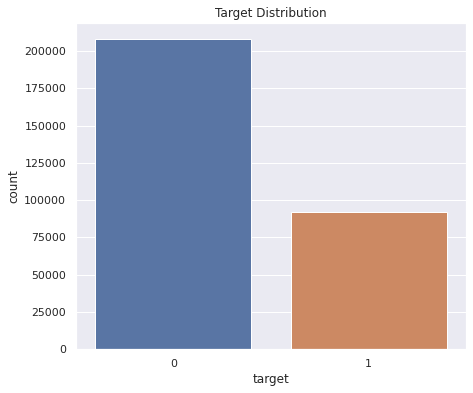

In [11]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution');

In [12]:
rectangle = ax.patches[0]
print('높이 :', rectangle.get_height())
print('너비 :', rectangle.get_width())
print('왼쪽 테두리 x축 위치 :', rectangle.get_x())

높이 : 208236
너비 : 0.8
왼쪽 테두리 x축 위치 : -0.4


In [13]:
print('텍스트 위치의 x좌표', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표 0.0
텍스트 위치의 y좌표 208536.0


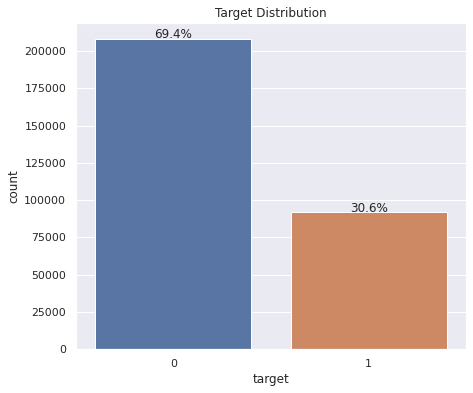

In [14]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬
        
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

이진 피처 분포

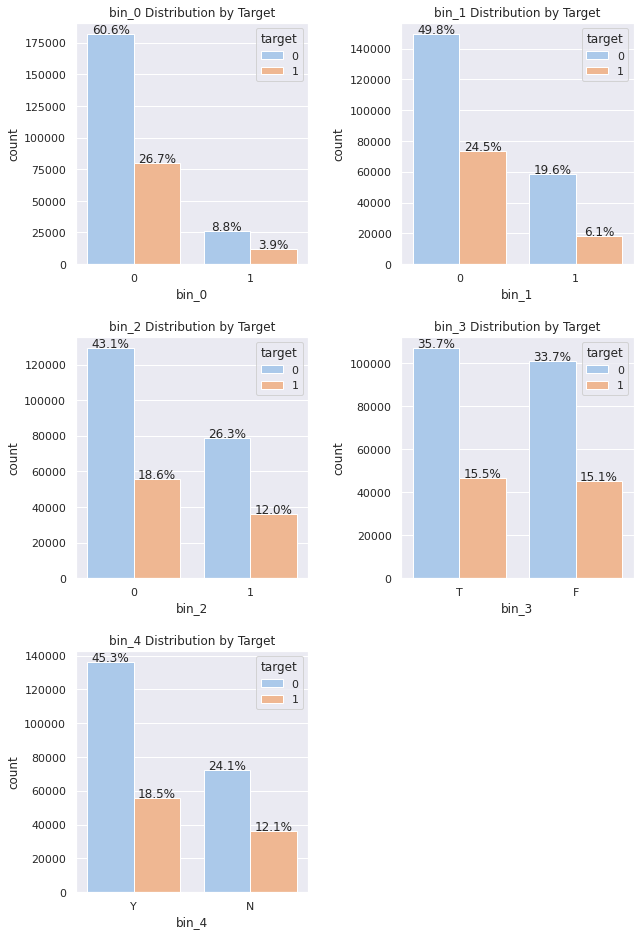

In [15]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
grid = gridspec.GridSpec(3, 2)              # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))                # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=train, hue='target',
                  palette='pastel', ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시

명목형 피처 분포

step 1: 교차분석표 생성 함수 만들기

In [16]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [17]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [18]:
# 교차분석표를 재활용 하기 위한 함수
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [19]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [20]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

step 2: pointplot 샘성 함수 만들기

In [21]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 pointplot 그리기
    sns.pointplot(x=feature, y=1, data=crosstab,
                  order=crosstab[feature].values, # 포인트플롯 순서
                  color='black', legend=False)
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

step 3:피처 분포도 및 피처별 타깃값 1의 비율 포인트 플롯 생성 함수 만들기

In [22]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(13, 18)):
    plt.figure(figsize=size)                     # 전체 figure 크기
    grid = gridspec.GridSpec(num_rows, num_cols) # subplot 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # subplot 상하/좌우 여백 설정
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)     # 교차분석표 생성
        
        # ax 축에 타깃값 분포 countplot 그리기
        sns.countplot(x=feature, data=df, order=crosstab[feature].values,
                      color='skyblue', ax=ax)   # order 가 없으면 정렬되어버림
        
        write_percent(ax, len(df))              # 비율 표시
        plot_pointplot(ax, feature, crosstab)   # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

# 함수 plot_pointplot이 crosstab으로 정렬되어있음, 그래서 countplot도 order 옵션이 crosstab으로 정렬되어야함.

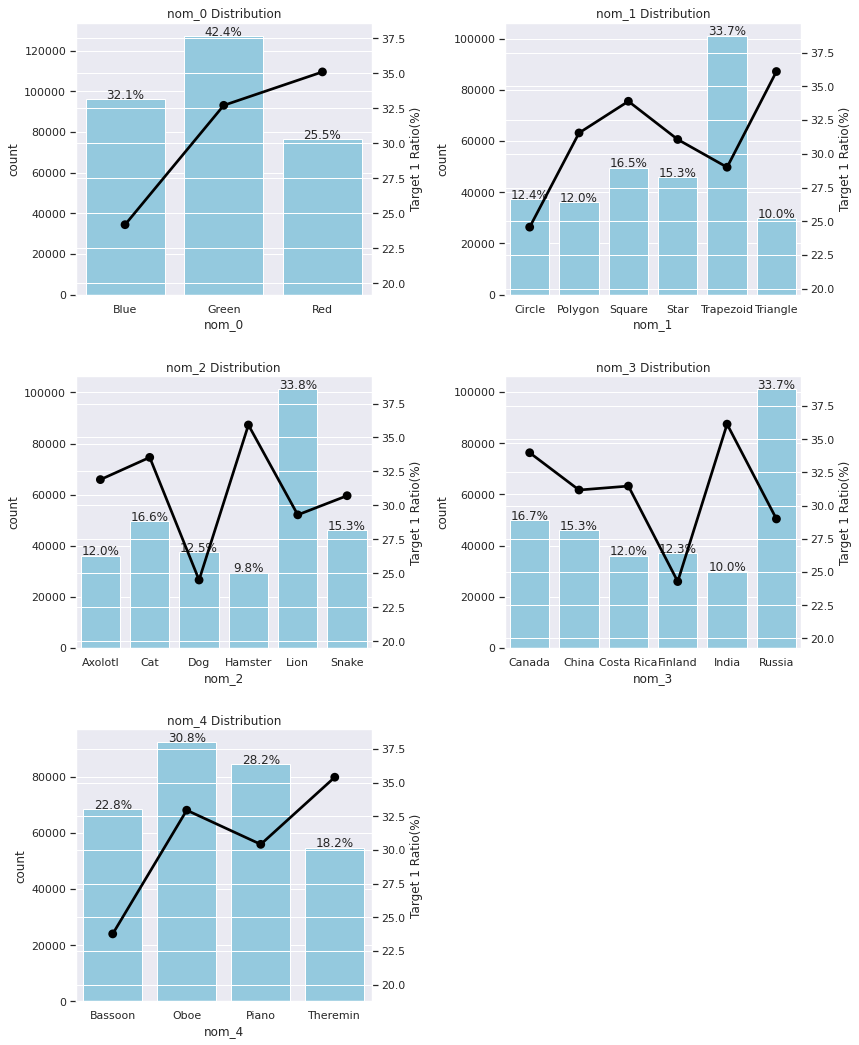

In [23]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, 3, 2)

순서형 피처 분포\
고유값이 적은 ord_0 ~ ord_3 까지 먼저 그림

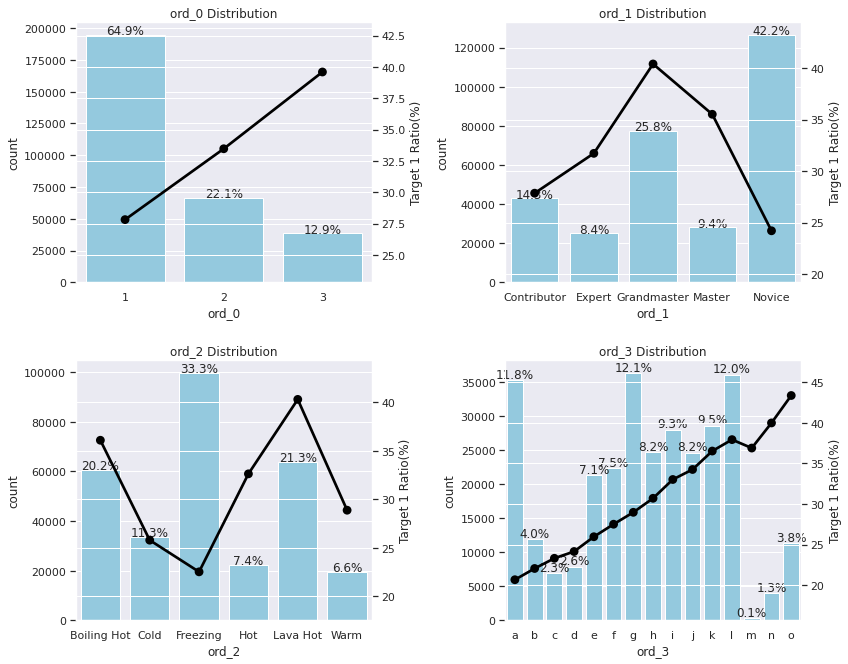

In [24]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 2, 2, size=(13, 11))

ord_1, ord_2 가 정렬이 되지 않았다.\
CategoricalDtype() 을 이용하면 피처에 순서를 지정할 수 있다.
- categories : 범주형 데이터 타입으로 인코딩할 값 목록
- ordered : True 로 설정하면 전달한 값의 순서로 유지된다.

In [25]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] =train['ord_1'].astype(ord_1_dtype)
train['ord_2'] =train['ord_2'].astype(ord_2_dtype)

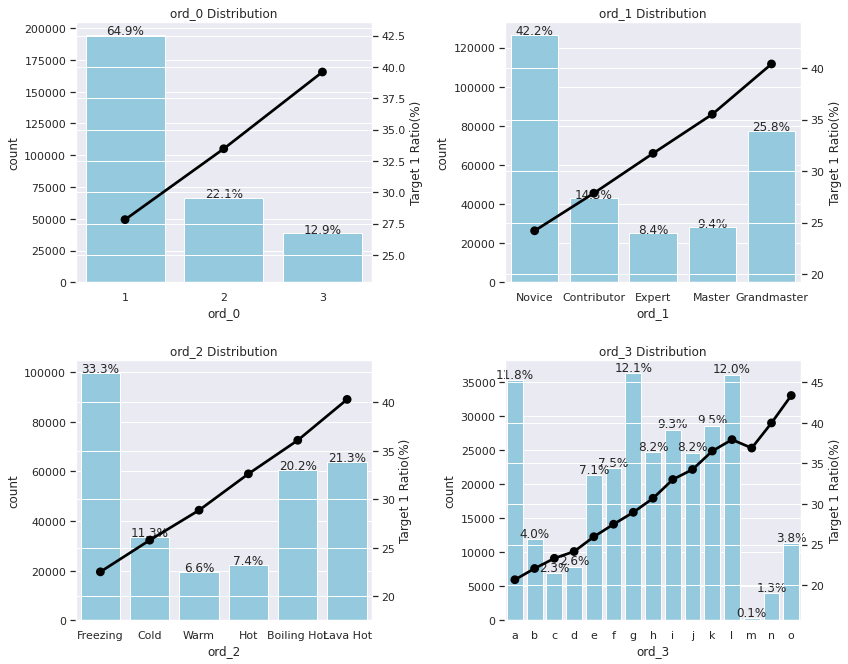

In [26]:
plot_cat_dist_with_true_ratio(train, ord_features, 2, 2, size=(13, 11))

고유값이 많은 ord_4, ord_5

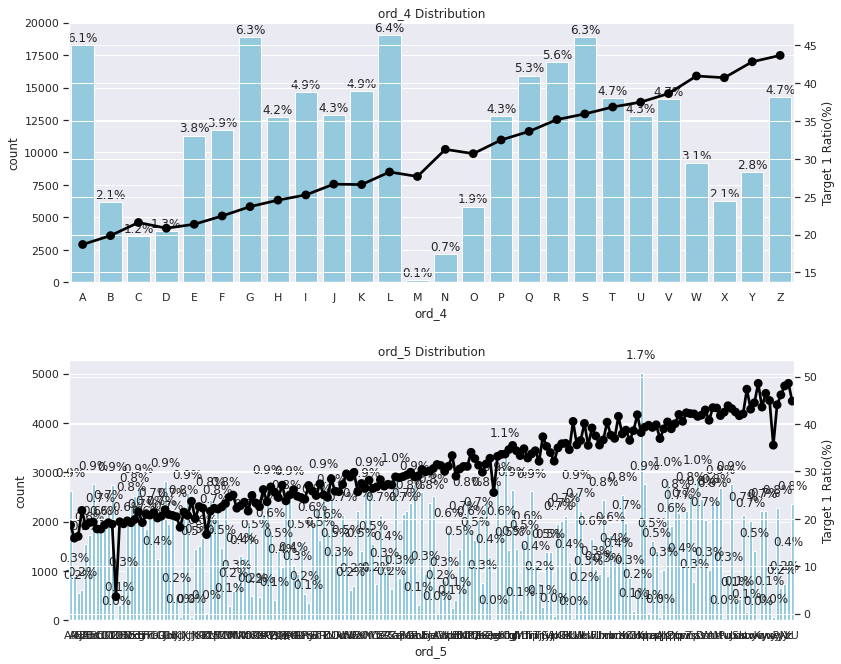

In [27]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 2, 1, size=(13, 11))

날짜 피처 분포

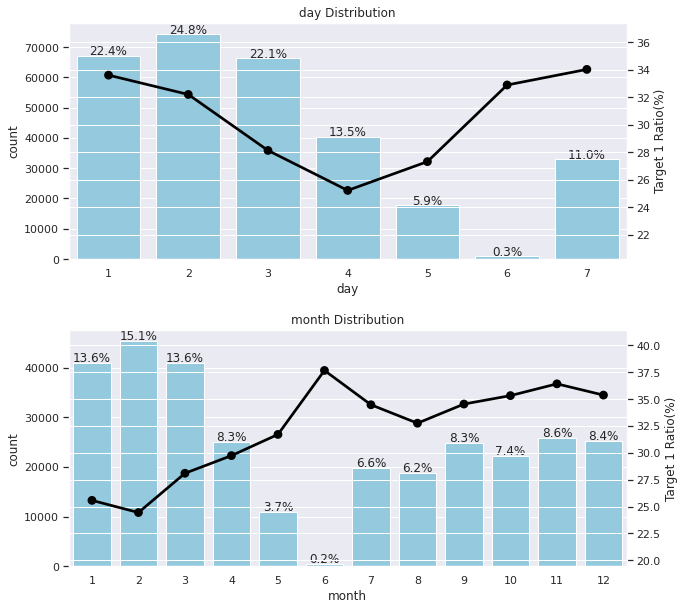

In [28]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 2, 1, size=(10, 10))

# 2. Baseline

## 7.3 범주형 데이터 이진분류 경진대회 베이스라인 모델
### 7.3.1 feature engineering

In [29]:
# 1. train, test 데이터 합치기.
all_data = pd.concat([train, test])

# 2. 합친 데이터에서 'target' column 제거
all_data = all_data.drop('target', axis=1)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


One-Hot encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
# 3. taget column이 제거된 전체 데이터를 원핫인코딩 적용
all_data_encoded = encoder.fit_transform(all_data)

데이터 나누기

In [31]:
# 4. data를 다시 train test 로 나누기 위해 train 데이터의 길이 만큼 자를 준비
num_train = len(train)  

# 5. train data, test data 분리 (여기서 X_train은 큰 의미없음)
X_train = all_data_encoded[:num_train]  # train 원래 길이 30만개
X_test = all_data_encoded[num_train:]   # test 원래 길이 20만개

y = train['target']  # X_train 을 훈련시키기 위한 target 변수가 된다.

- **test_size**: 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 0.2는 전체 데이터 셋의 **20%**를 test (validation) 셋으로 지정하겠다는 의미입니다. default 값은 0.25 입니다.
- **shuffle**: **default=True** 입니다. **split**을 해주기 이전에 섞을건지 여부입니다. 보통은 default 값으로 놔둡니다.
- **stratify**: **default=None** 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. **stratify** 값을 **target**으로 지정해주면 각각의 **class 비율(ratio)을 train / validation**에 유지해 줍니다. (한 쪽에 **쏠려서 분배되는 것을 방지**합니다) 만약 이 옵션을 지정해 주지 않고 **classification** 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
- **random_state**: 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.

In [32]:
from sklearn.model_selection import train_test_split

# 최초 train data 에서 훈련과 검증 데이터로 분리
X_train, X_valid, y_train, y_valid= train_test_split(X_train, y, test_size=0.1,
                                                     stratify=y, random_state=10)

### 7.3.2 모델 훈련

In [33]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 7.3.3 모델 성능 검증

In [34]:
logistic_model.predict_proba(X_valid)

array([[0.23265324, 0.76734676],
       [0.91403908, 0.08596092],
       [0.8303673 , 0.1696327 ],
       ...,
       [0.24860685, 0.75139315],
       [0.49451672, 0.50548328],
       [0.95655532, 0.04344468]])

In [35]:
logistic_model.predict(X_valid)

array([1, 0, 0, ..., 1, 1, 0])

In [36]:
# 검증 데이터를 활용한 타깃 예측
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]
y_valid_preds

array([0.76734676, 0.08596092, 0.1696327 , ..., 0.75139315, 0.50548328,
       0.04344468])

In [37]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.7965


### 7.3.4 예측 및 결과 제출 

In [38]:
# 타깃값 1일 확률 예측
y_preds = logistic_model.predict_proba(X_test)[:, 1]

In [39]:
# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')